In [23]:
#%% libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

#%% data
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
UID,,,,,,,,,,,,,,,,,,,,,
84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


In [31]:
covid_df.to_csv('covid_df.csv', index=False)

In [ ]:
covid_df.head()
# a= covid_df.columns
# print(a)

In [ ]:
#%% Instructions
'''
Overall instructions:
As described in the homework description, each graphic you make must:
   1. Have a thoughtful title
   2. Have clearly labelled axes 
   3. Be legible
   4. Not be a pie chart
I should be able to run your .py file and recreate the graphics without error.
As per usual, any helper variables or columns you create should be thoughtfully
named.
'''

/var/folders/9s/m83p31z54sq2pmb926wsx2yr0000gn/T/ipykernel_54741/895549084.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  utah_long['Date'] = pd.to_datetime(utah_long['Date'])


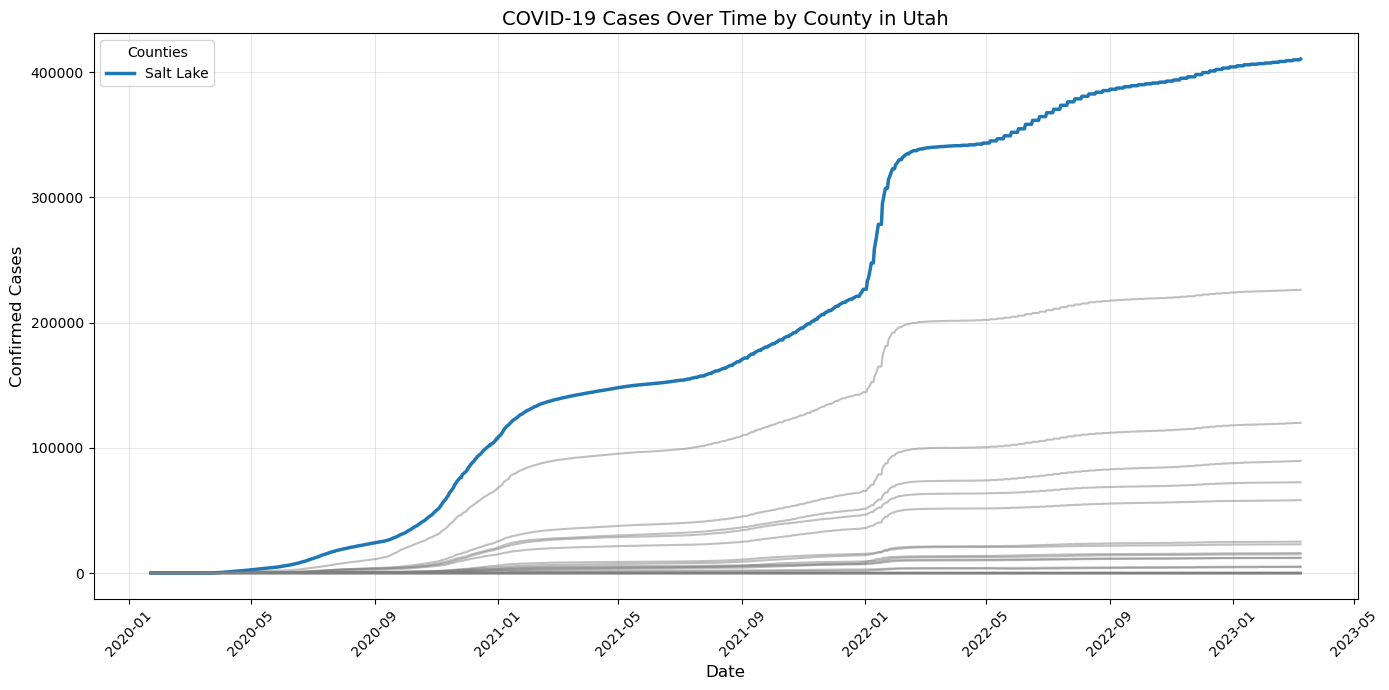

In [33]:
#%% viz 1
'''
Create a visualization that shows all of the counties in Utah as a time series,
similar to the one shown in slide 22 during the lecture. The graphic should
-Show cases over time
-Have all counties plotted in a background color (something like grey)
-Have a single county plotted in a contrasting color (something not grey)
-Have well formatted dates as the X axis
'''

#%% visualization
# Filter for counties in Utah
utah_data = covid_df[covid_df['Province_State'] == 'Utah']

# Reshape the data: from wide format to long format for easier plotting
date_columns = utah_data.columns[11:]  # Columns containing dates
utah_long = utah_data.melt(
    id_vars=["Admin2"],  # County names
    value_vars=date_columns,  # Date columns
    var_name="Date",  # Name for the new date column
    value_name="Cases"  # Name for the new cases column
)

# Format the 'Date' column
utah_long['Date'] = pd.to_datetime(utah_long['Date'])

# Choose a county to highlight
highlight_county = 'Salt Lake'

# Plotting
plt.figure(figsize=(14, 7))

# Plot all counties in grey
for county in utah_long['Admin2'].unique():
    county_data = utah_long[utah_long['Admin2'] == county]
    if county == highlight_county:
        plt.plot(
            county_data['Date'], 
            county_data['Cases'], 
            label=county, 
            linewidth=2.5
        )
    else:
        plt.plot(
            county_data['Date'], 
            county_data['Cases'], 
            color='grey', 
            alpha=0.5
        )

# Customize the plot
plt.title("COVID-19 Cases Over Time by County in Utah", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Confirmed Cases", fontsize=12)
plt.legend(loc='upper left', title="Counties")
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

/var/folders/9s/m83p31z54sq2pmb926wsx2yr0000gn/T/ipykernel_54741/1377507206.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  utah_data_long['Date'] = pd.to_datetime(utah_data_long['Date'])
/var/folders/9s/m83p31z54sq2pmb926wsx2yr0000gn/T/ipykernel_54741/1377507206.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  florida_data_long['Date'] = pd.to_datetime(florida_data_long['Date'])


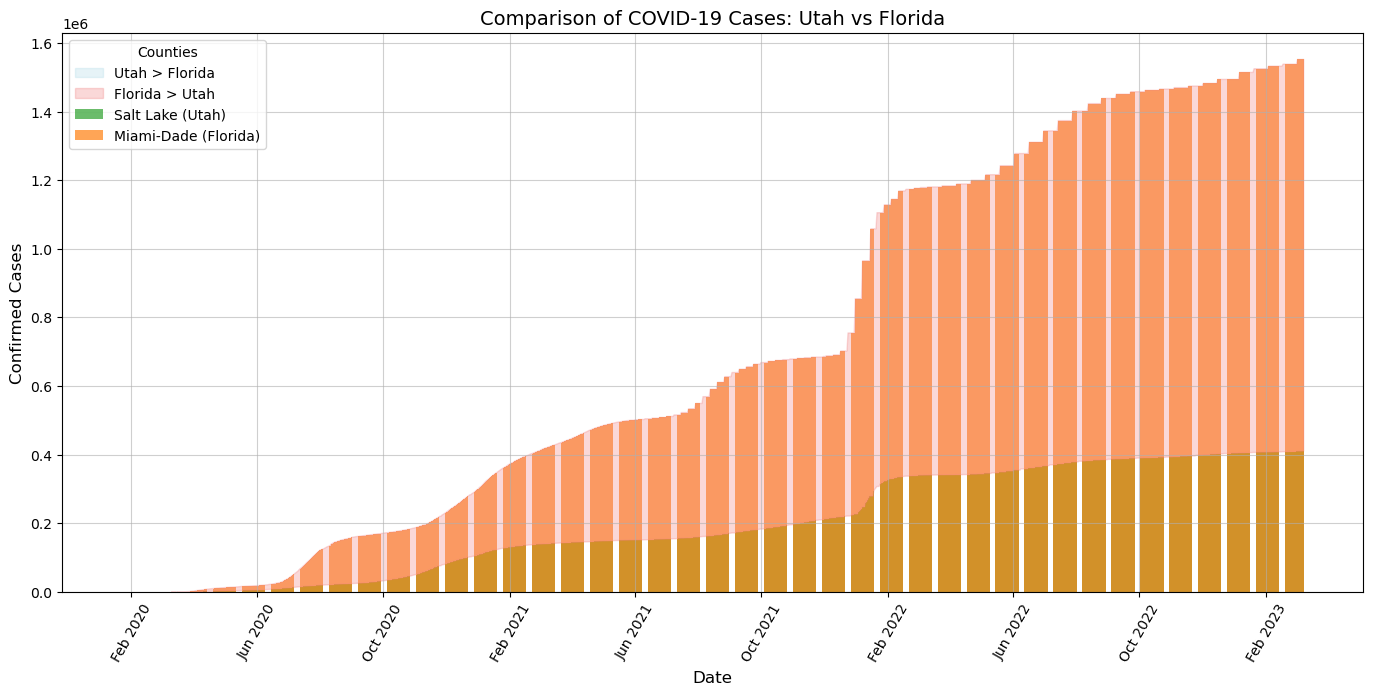

In [109]:
#%% viz 2
'''
Create a visualization that shows the contrast between the county in Utah with
the most cases to date to a county in Florida with the most cases to date.
The graphic should:
-Have only two counties plotted
-Highlight the difference between the two comparison counties
You may use any style of graphic you like as long as it is effective (dense)
and readable
'''
#%% Data
# Ensure you have the data loaded and the variables `utah_most_cases_county` and `florida_most_cases_county` defined.

utah_data = covid_df[covid_df['Province_State'] == 'Utah']
florida_data = covid_df[covid_df['Province_State'] == 'Florida']

utah_data_long = utah_data.melt(
    id_vars=["Admin2"],  # County names
    value_vars=date_columns,  # Date columns
    var_name="Date",  # Name for the new date column
    value_name="Cases"  # Name for the new cases column
)
utah_data_long['Date'] = pd.to_datetime(utah_data_long['Date'])

florida_data_long = florida_data.melt(
    id_vars=["Admin2"],  # County names
    value_vars=date_columns,  # Date columns
    var_name="Date",  # Name for the new date column
    value_name="Cases"  # Name for the new cases column
)
florida_data_long['Date'] = pd.to_datetime(florida_data_long['Date'])

# Filter data for the counties with the most cases in Utah and Florida
utah_comparison_data = utah_data_long[utah_data_long['Admin2'] == utah_most_cases_county]
florida_comparison_data = florida_data_long[florida_data_long['Admin2'] == florida_most_cases_county]

# Merge the data for comparison
comparison_data = pd.merge(
    utah_comparison_data,
    florida_comparison_data,
    on='Date',
    suffixes=('_Utah', '_Florida')
)

#%% Visualization
plt.figure(figsize=(14, 7))

# Create bar chart for Utah's most affected county
plt.bar(
    comparison_data['Date'], 
    comparison_data['Cases_Utah'], 
    label=f"{utah_most_cases_county} (Utah)", 
    color='tab:green', 
    alpha=0.7
)

# Create bar chart for Florida's most affected county
plt.bar(
    comparison_data['Date'], 
    comparison_data['Cases_Florida'], 
    label=f"{florida_most_cases_county} (Florida)", 
    color='tab:orange', 
    alpha=0.7
)

# Highlight the difference
plt.fill_between(
    comparison_data['Date'],
    comparison_data['Cases_Utah'],
    comparison_data['Cases_Florida'],
    where=(comparison_data['Cases_Utah'] > comparison_data['Cases_Florida']),
    interpolate=True,
    color='lightblue',
    alpha=0.3,
    label="Utah > Florida"
)
plt.fill_between(
    comparison_data['Date'],
    comparison_data['Cases_Florida'],
    comparison_data['Cases_Utah'],
    where=(comparison_data['Cases_Florida'] > comparison_data['Cases_Utah']),
    interpolate=True,
    color='lightcoral',
    alpha=0.3,
    label="Florida > Utah"
)

# Customize the plot
plt.title("Comparison of COVID-19 Cases: Utah vs Florida", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Confirmed Cases", fontsize=12)
plt.legend(title="Counties", fontsize=10)
plt.grid(alpha=0.6)
plt.xticks(rotation=60)
plt.tight_layout()

# Adjust x-axis for less frequent date ticks (every 4 months)
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=4))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%b %Y"))

plt.show() # brown colors are due to mixed colors of green (SLC) and orange (Miami-Dade)

/var/folders/9s/m83p31z54sq2pmb926wsx2yr0000gn/T/ipykernel_54741/1639821631.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(case_columns)


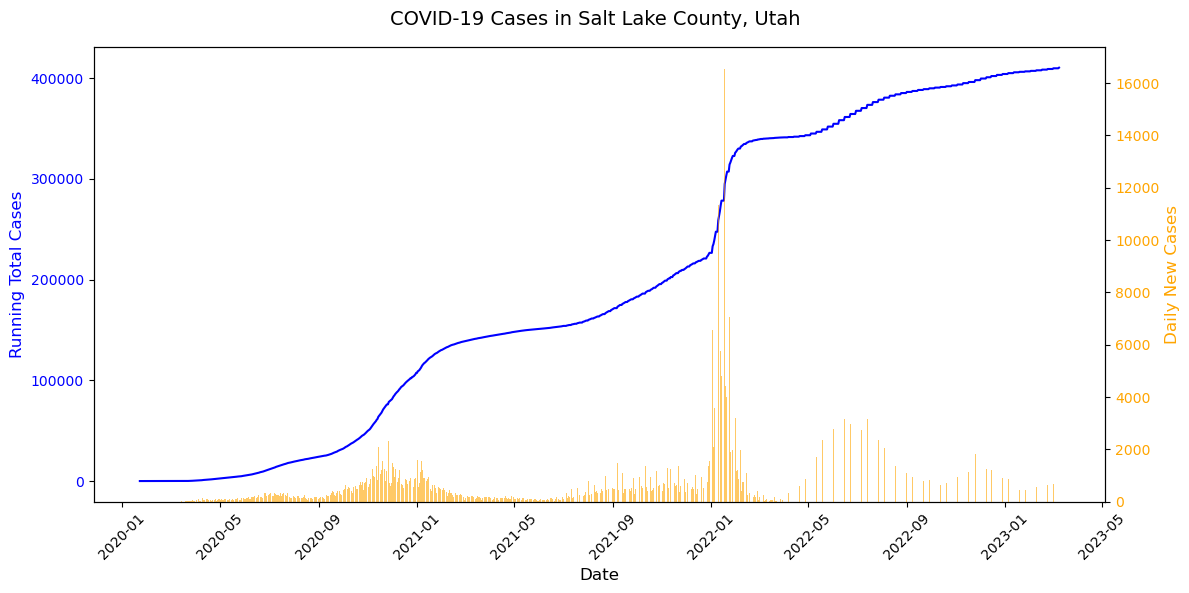

In [53]:
#%% viz 3
'''
Create a visualization that shows BOTH the running total of cases for a single
county AND the daily new cases. The graphic should:
-Use two y-axes (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)
-Use color to contrast the two series being plotted
-Have well formatted dates as the X axis
'''

# Select a single county (e.g., Salt Lake County, Utah)
county_name = "Salt Lake"
state_name = "Utah"

county_data = covid_df[
    (covid_df['Admin2'] == county_name) & (covid_df['Province_State'] == state_name)
]

# Extract the dates and case data
case_columns = covid_df.columns[11:]  # The daily case counts start from the 12th column onward
dates = pd.to_datetime(case_columns)
running_total = county_data[case_columns].values.flatten()

# Compute daily new cases
daily_new_cases = pd.Series(running_total).diff().fillna(0)

# Create the visualization
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot running total on the left y-axis
ax1.plot(dates, running_total, color='blue', label='Running Total')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Running Total Cases', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
ax1.tick_params(axis='x', rotation=45)

# Plot daily new cases on the right y-axis
ax2 = ax1.twinx()
ax2.bar(dates, daily_new_cases, color='orange', alpha=0.6, label='Daily New Cases')
ax2.set_ylabel('Daily New Cases', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# Add a title and legend
fig.suptitle(f"COVID-19 Cases in {county_name} County, {state_name}", fontsize=14)
fig.tight_layout()
plt.show()

/var/folders/9s/m83p31z54sq2pmb926wsx2yr0000gn/T/ipykernel_54741/3809159910.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Cases'] = state_data[case_columns].iloc[:, -1]


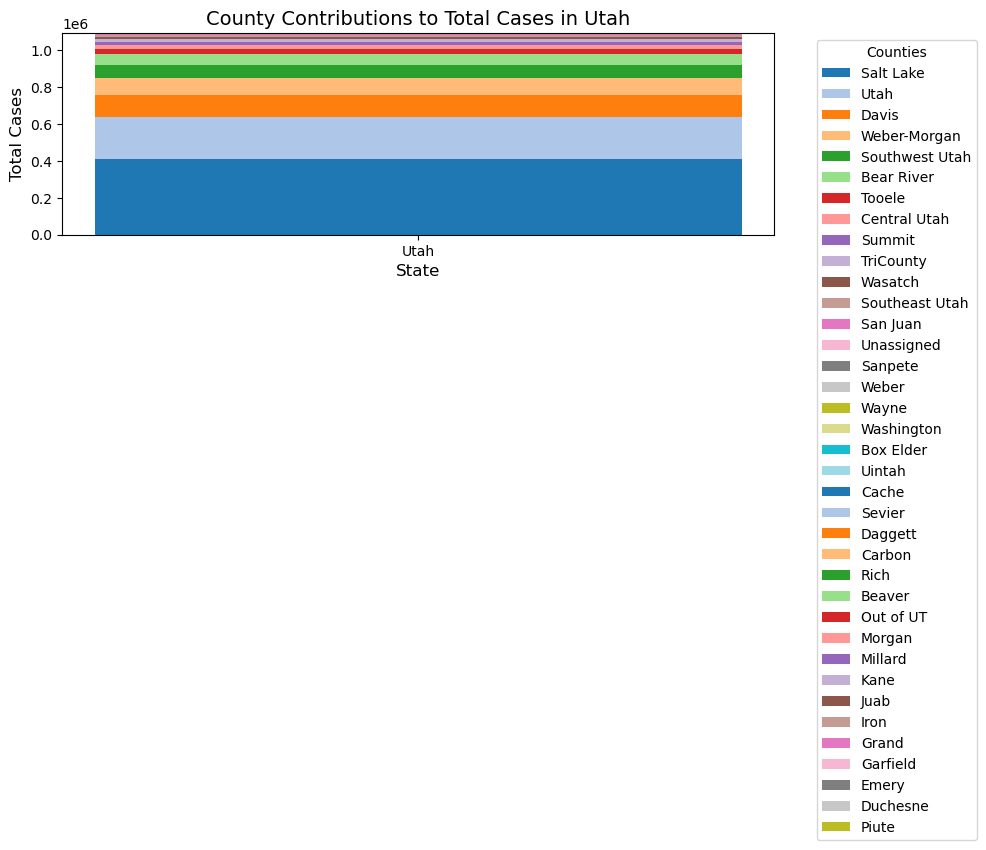

In [61]:
#%% viz 4
'''
Create a visualization that shows a stacked bar chart of county contributions
to a given state's total cases. You may choose any state (or states).
(https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py)
The graphic should:
-Have a single column delineate a state
-Have each 'slice' or column compontent represent a county
'''
state_name = "Utah"

# Filter data for the chosen state
state_data = covid_df[covid_df['Province_State'] == state_name]

# Calculate total cases for the most recent date for each county
state_data['Total_Cases'] = state_data[case_columns].iloc[:, -1]

# Sort counties by total cases for better visualization
state_data = state_data.sort_values('Total_Cases', ascending=False)

# Prepare data for plotting
counties = state_data['Admin2']
cases = state_data['Total_Cases']

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a unique color for each county
colors = plt.cm.tab20.colors  # Use a colormap for distinct colors
color_cycle = [colors[i % len(colors)] for i in range(len(counties))]

# Plot each county's contribution
bottom = 0
for i, (county, case) in enumerate(zip(counties, cases)):
    ax.bar(state_name, case, bottom=bottom, label=county, color=color_cycle[i])
    bottom += case

# Customize the chart
ax.set_title(f"County Contributions to Total Cases in {state_name}", fontsize=14)
ax.set_xlabel("State", fontsize=12)
ax.set_ylabel("Total Cases", fontsize=12)
ax.legend(title="Counties", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

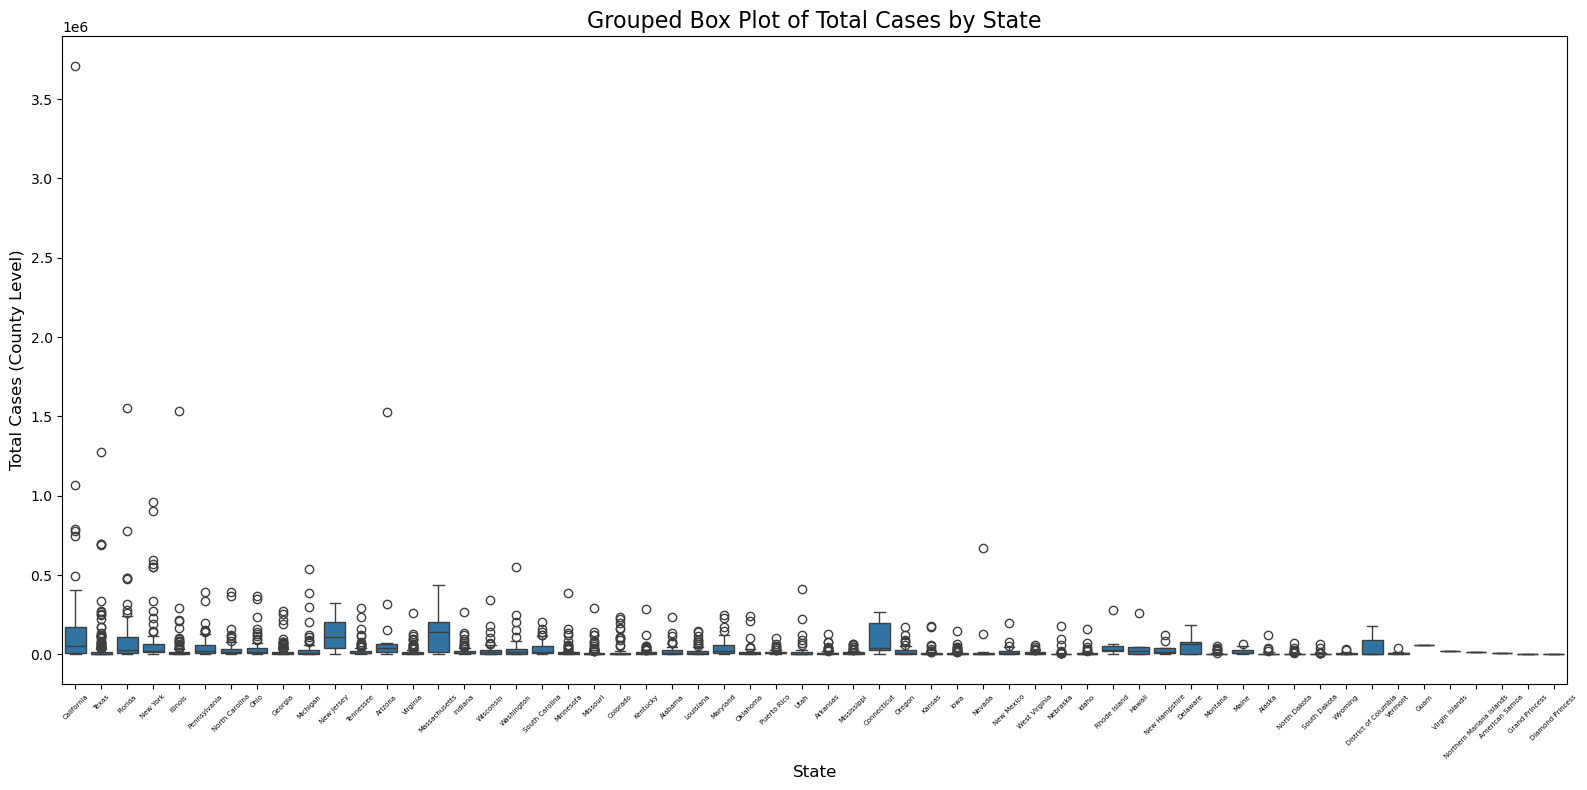

In [127]:
#%% extra credit (5 points)
'''
Use Seaborn to create a grouped box plot of all reported states. Each boxplot
should be a distinct state. Have the states ordered from most cases (FL) to fewest 
cases. (https://seaborn.pydata.org/examples/grouped_boxplot.html)
'''

# Prepare the data for plotting
# Calculate total cases for each state and add a column for state total
covid_df['Total_Cases'] = covid_df[case_columns].iloc[:, -1]
state_totals = covid_df.groupby('Province_State')['Total_Cases'].sum().reset_index()
state_totals = state_totals.sort_values(by='Total_Cases', ascending=False)

# Merge total cases with the original data
covid_df = covid_df.merge(state_totals, on='Province_State', suffixes=('', '_State'))

# Create the boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(
    data=covid_df,
    x='Province_State',
    y='Total_Cases',
    order=state_totals['Province_State']
)

# Customize the plot
plt.title('Grouped Box Plot of Total Cases by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Cases (County Level)', fontsize=12)
plt.xticks(rotation=45, fontsize=5)
plt.tight_layout()
plt.show()